### Exercício 3 (MNIST). Vamos comparar métodos de classificação para um problema clássico em machine learning: 
### classificação de imagem de dígitos no dataset MNIST. Rode o seguinte trecho de código para carregar os dados, 
### os modelos, realizar a divisão dos dados em treino e teste e visualizar algumas amostras contendo os dígitos.

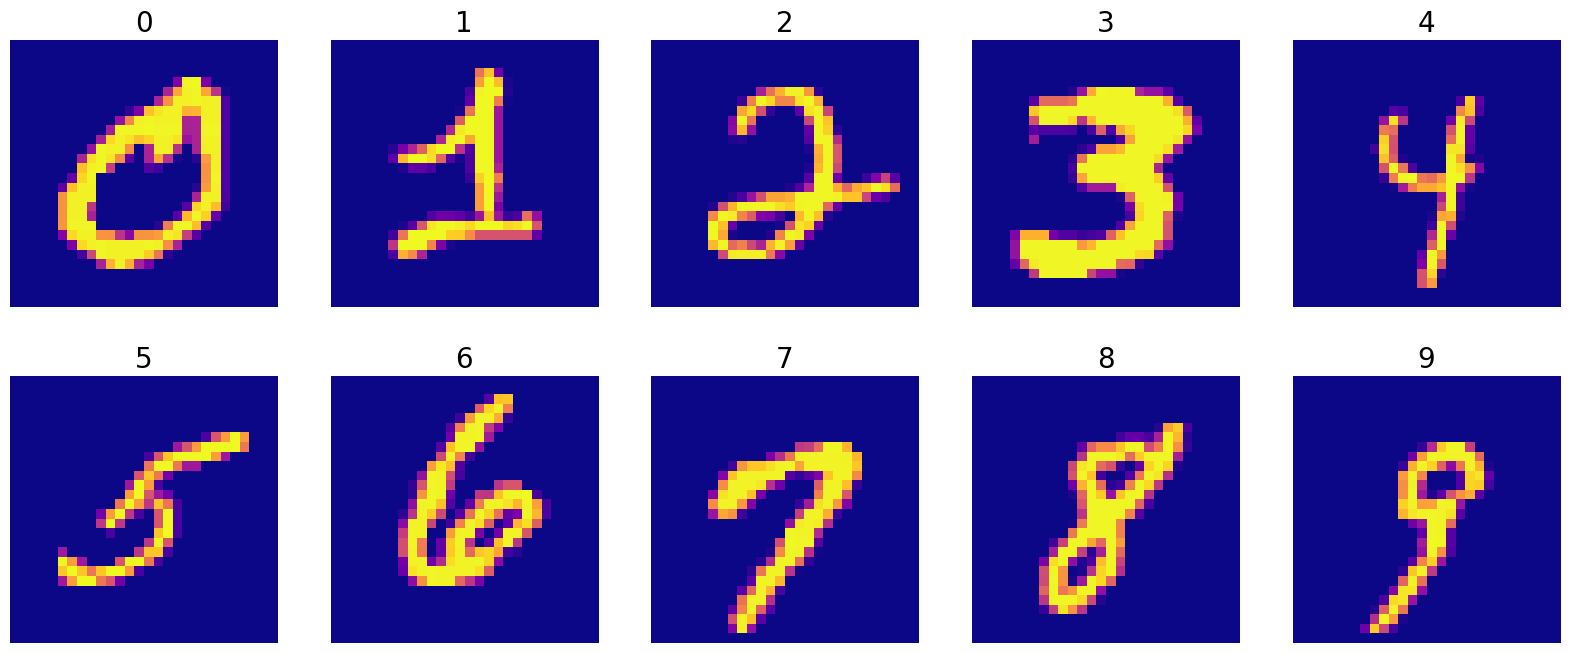

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
def plot_digits(images,
n_rows = 2,
n_cols = 5,
fig_shape = (20,8),
indexes = [0,1,2,3,4,5,6,7,8,9],
img_shape = (28,28),
labels = [0,1,2,3,4,5,6,7,8,9]):
    fig, axs = plt.subplots(n_rows, n_cols, figsize = fig_shape)
    ind = np.array(indexes).reshape(n_rows, n_cols)
    if labels:
        plt_labels = np.array(labels).reshape(n_rows, n_cols)
    for i in range(0,n_rows):
        for j in range(0,n_cols):
            if labels:
                axs[i,j].set_title(plt_labels[i,j], fontsize = 20)

            axs[i,j].imshow((images[ind[i,j]].reshape(img_shape)), cmap = "plasma")
            axs[i,j].axis('off')

mnist = fetch_openml("mnist_784") # Baixar os dados
X, y = mnist.data.to_numpy(), mnist.target.to_numpy()
X = X/255 # Colocar as features em [0, 1]
# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,
y,
test_size=0.2,
random_state=42)
# Plot dos digítos
plot_digits(X,n_rows = 2,n_cols = 5,indexes = [21, 24, 16, 27, 26, 35, 13, 15, 17, 19])

## (a) Defina os seguintes modelos:

In [ ]:
nb = BernoulliNB(force_alpha=True) # Naive Bayes com features bernoulli
lda = LinearDiscriminantAnalysis() # LDA
qda = QuadraticDiscriminantAnalysis(reg_param=1e-2)  
lr = LogisticRegression(random_state=42) # Regressão Logística
knn = KNeighborsClassifier(n_neighbors=6) # kNN com k = 6
svc = svm.SVC(gamma="scale",class_weight="balanced",C=100) # SVM
rf = RandomForestClassifier(max_depth=30, random_state=0,n_estimators = 100,) # Random forest
nn = MLPClassifier(random_state=42, hidden_layer_sizes = [100],max_iter=300,) # Rede neural

### Treine cada um destes modelos nos dados de treino e calcule a acurácia no conjunto de treino e de teste. Compare a acurácia e o tempo (em segundos) para treinar e o tempo para gerar previsões obtido nos modelos vistos na primeira parte do curso (NB, LDA, QDA, Regressão Logística e KNN) com os vistos na segunda parte (SVM, random forests e redes neurais). Quais têm melhor acurácia? Quais rodam mais rápido?

In [3]:
import time
from sklearn.metrics import accuracy_score

models = [nb, lda, qda, lr, knn, svc, rf, nn]

results = {}
time_per_model = {}
pred_time_per_model = {}

for model in models:

    model_name = type(model).__name__

    print(model_name)
    start_time = time.perf_counter()
    model.fit(X_train, y_train)
    end_time = time.perf_counter()

    training_time = end_time - start_time
    time_per_model[model_name] = training_time

    pred_time_per_model[model_name] = []

    start_time = time.perf_counter()
    y_pred_train = model.predict(X_train)
    end_time = time.perf_counter()
    training_time = end_time - start_time
    pred_time_per_model[model_name].append(training_time)

    start_time = time.perf_counter()
    y_pred_test = model.predict(X_test)
    end_time = time.perf_counter()
    training_time = end_time - start_time
    pred_time_per_model[model_name].append(training_time)
    

    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)

    results[model_name] = {
        "train_accuracy": train_acc,
        "test_accuracy": test_acc
    }

for model_name in results:
    print(f"\nModelo: {model_name}")
    print(f"Train Accuracy: {results[model_name]['train_accuracy']:.4f}")
    print(f"Test Accuracy:  {results[model_name]['test_accuracy']:.4f}")
    print(f"Tempo de treino: {time_per_model[model_name]:.6f} segundos")
    print(f"Tempo para gerar previsões: Treino = {pred_time_per_model[model_name][0]}, Teste = {pred_time_per_model[model_name][1]}")


BernoulliNB
LinearDiscriminantAnalysis
QuadraticDiscriminantAnalysis
LogisticRegression


/Users/gabri/Classes/MachineLearning2026/venv/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier
SVC
RandomForestClassifier
MLPClassifier

Modelo: BernoulliNB
Train Accuracy: 0.8319
Test Accuracy:  0.8349
Tempo de treino: 0.410883 segundos
Tempo para gerar previsões: Treino = 0.17328291600000512, Teste = 0.07582820800000434

Modelo: LinearDiscriminantAnalysis
Train Accuracy: 0.8727
Test Accuracy:  0.8677
Tempo de treino: 5.143242 segundos
Tempo para gerar previsões: Treino = 0.02737529099999847, Teste = 0.00704595799999197

Modelo: QuadraticDiscriminantAnalysis
Train Accuracy: 0.9574
Test Accuracy:  0.9429
Tempo de treino: 3.283383 segundos
Tempo para gerar previsões: Treino = 3.570451666999986, Teste = 0.9491667499999892

Modelo: LogisticRegression
Train Accuracy: 0.9363
Test Accuracy:  0.9203
Tempo de treino: 4.186970 segundos
Tempo para gerar previsões: Treino = 0.02722708299998544, Teste = 0.007080916999996134

Modelo: KNeighborsClassifier
Train Accuracy: 0.9786
Test Accuracy:  0.9690
Tempo de treino: 0.069425 segundos
Tempo para gerar previsões: Treino = 

In [4]:
for model_name in results:
    print(f"\nModelo: {model_name}")
    print(f"Train Accuracy: {results[model_name]['train_accuracy']:.4f}")
    print(f"Test Accuracy:  {results[model_name]['test_accuracy']:.4f}")
    print(f"Tempo de treino: {time_per_model[model_name]:.6f} segundos")
    print(f"Tempo para gerar previsões: Treino = {pred_time_per_model[model_name][0]:.6f} segundos, Teste = {pred_time_per_model[model_name][1]:.6f} segundos")


Modelo: BernoulliNB
Train Accuracy: 0.8319
Test Accuracy:  0.8349
Tempo de treino: 0.410883 segundos
Tempo para gerar previsões: Treino = 0.173283 segundos, Teste = 0.075828 segundos

Modelo: LinearDiscriminantAnalysis
Train Accuracy: 0.8727
Test Accuracy:  0.8677
Tempo de treino: 5.143242 segundos
Tempo para gerar previsões: Treino = 0.027375 segundos, Teste = 0.007046 segundos

Modelo: QuadraticDiscriminantAnalysis
Train Accuracy: 0.9574
Test Accuracy:  0.9429
Tempo de treino: 3.283383 segundos
Tempo para gerar previsões: Treino = 3.570452 segundos, Teste = 0.949167 segundos

Modelo: LogisticRegression
Train Accuracy: 0.9363
Test Accuracy:  0.9203
Tempo de treino: 4.186970 segundos
Tempo para gerar previsões: Treino = 0.027227 segundos, Teste = 0.007081 segundos

Modelo: KNeighborsClassifier
Train Accuracy: 0.9786
Test Accuracy:  0.9690
Tempo de treino: 0.069425 segundos
Tempo para gerar previsões: Treino = 26.388820 segundos, Teste = 5.985162 segundos

Modelo: SVC
Train Accuracy: 1

## (b) Para cada um dos gráficos gerados pelos códigos abaixo, explique o que está sendo mostrado, como isso se relaciona com as previsões do modelo em questão e se é possível interpretar com facilidade o que está acontecendo.

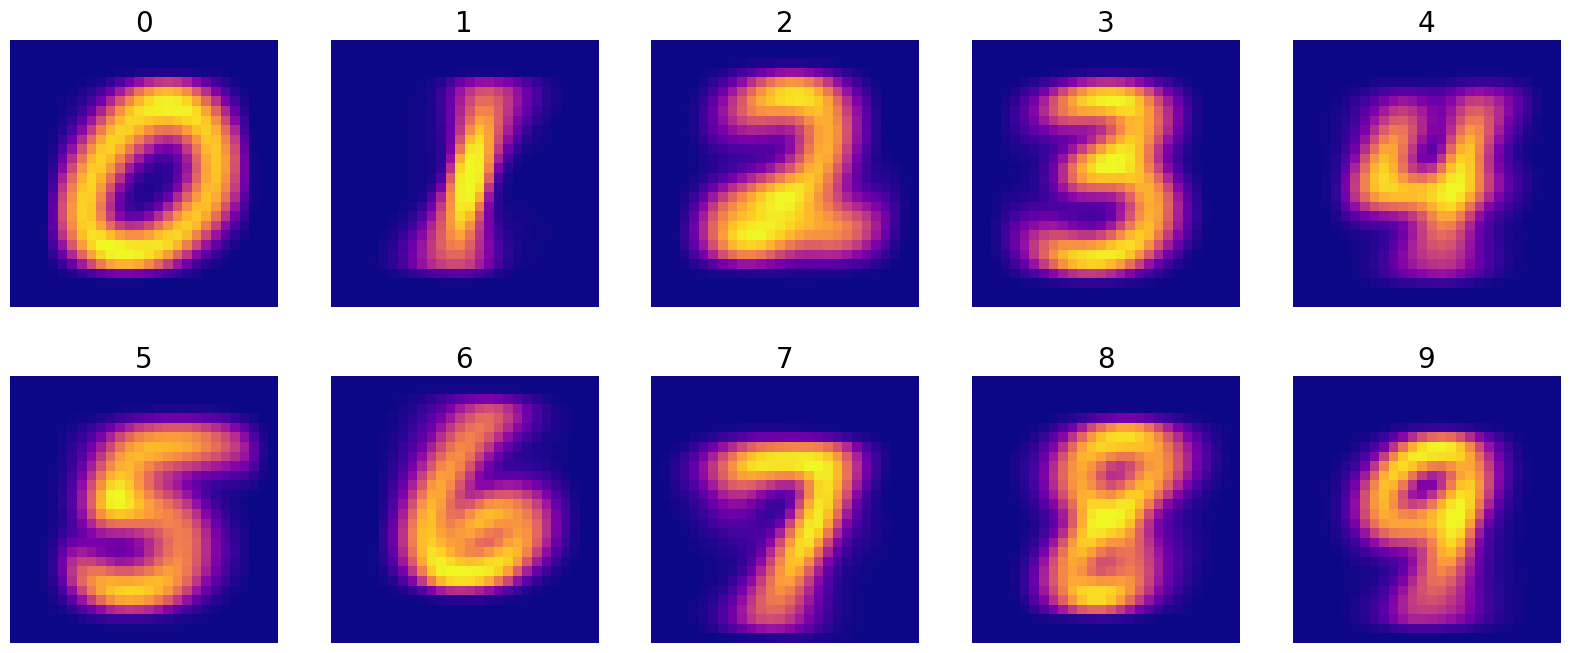

In [5]:
nb_params = {}
for i in range(0,10):
    nb_params[i] = np.exp(nb.feature_log_prob_[i])
plot_digits(nb_params)

In [6]:
print(nb.feature_log_prob_[1])
print(np.exp(nb.feature_log_prob_[1]))

[-8.74496601e+00 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00
 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00
 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00
 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00
 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00
 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00
 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00
 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00
 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00
 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00
 -8.74496601e+00 -8.74496601e+00 -7.64635372e+00 -7.64635372e+00
 -7.64635372e+00 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00
 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00
 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00
 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00
 -8.74496601e+00 -8.74496

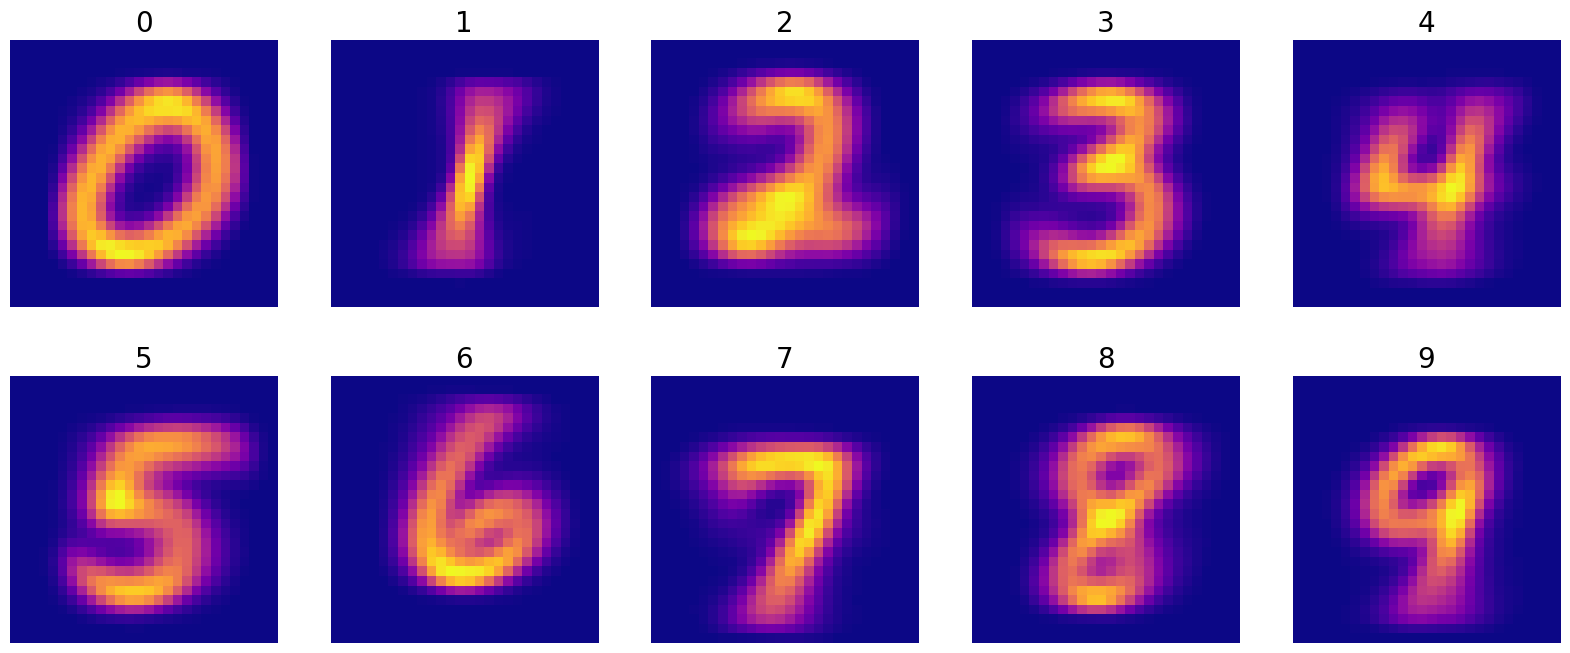

In [7]:
lda_params = {}
for i in range(0,10):
    lda_params[i] = lda.means_[i]
plot_digits(lda_params)

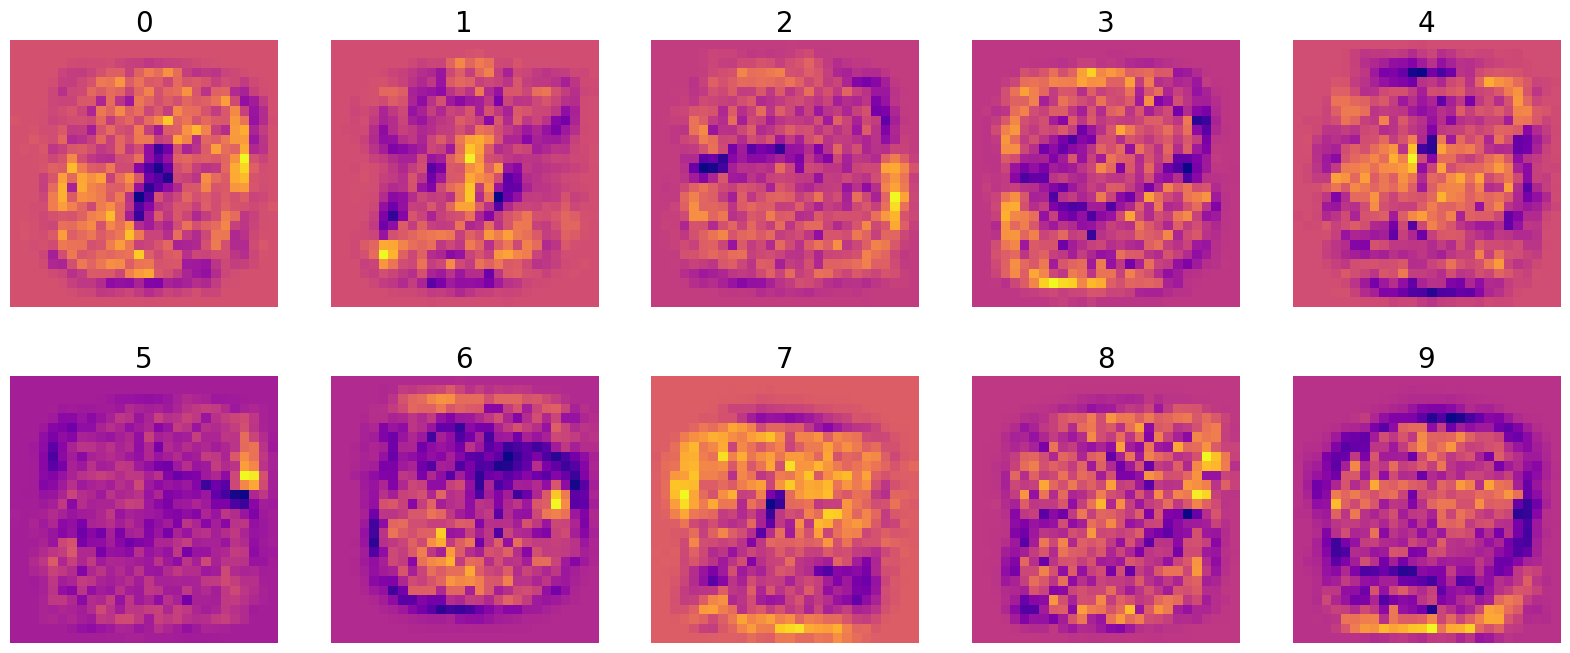

In [8]:
log_reg_params = {}
for i in range(0,10):
    log_reg_params[i] = lr.coef_[i]
plot_digits(log_reg_params)

In [13]:
rf.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.43768761e-06, 3.88165120e-07, 3.06643297e-06,
       7.74473490e-07, 1.43697757e-06, 1.16729288e-06, 2.24292751e-06,
       3.61541089e-07, 1.30014522e-06, 5.25605910e-06, 3.94771237e-06,
       4.28730805e-06, 2.41974190e-06, 9.83645706e-07, 1.94133185e-06,
       9.15729856e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

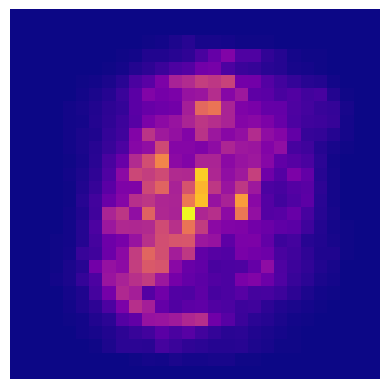

In [9]:

rf_params = rf.feature_importances_.reshape(28,28)
plt.axis("off")
plt.imshow(rf_params, cmap = "plasma")

In [10]:
nn_params_1 = {}
for i in range(0,100):
    nn_params_1[i] = nn.coefs_[0][:,i]
indexes = [i for i in range(0,100)]
plot_digits(nn_params_1,n_rows = 10, n_cols = 10, 
            fig_shape = (100,100),indexes = indexes, 
            img_shape = (28,28),labels = None)


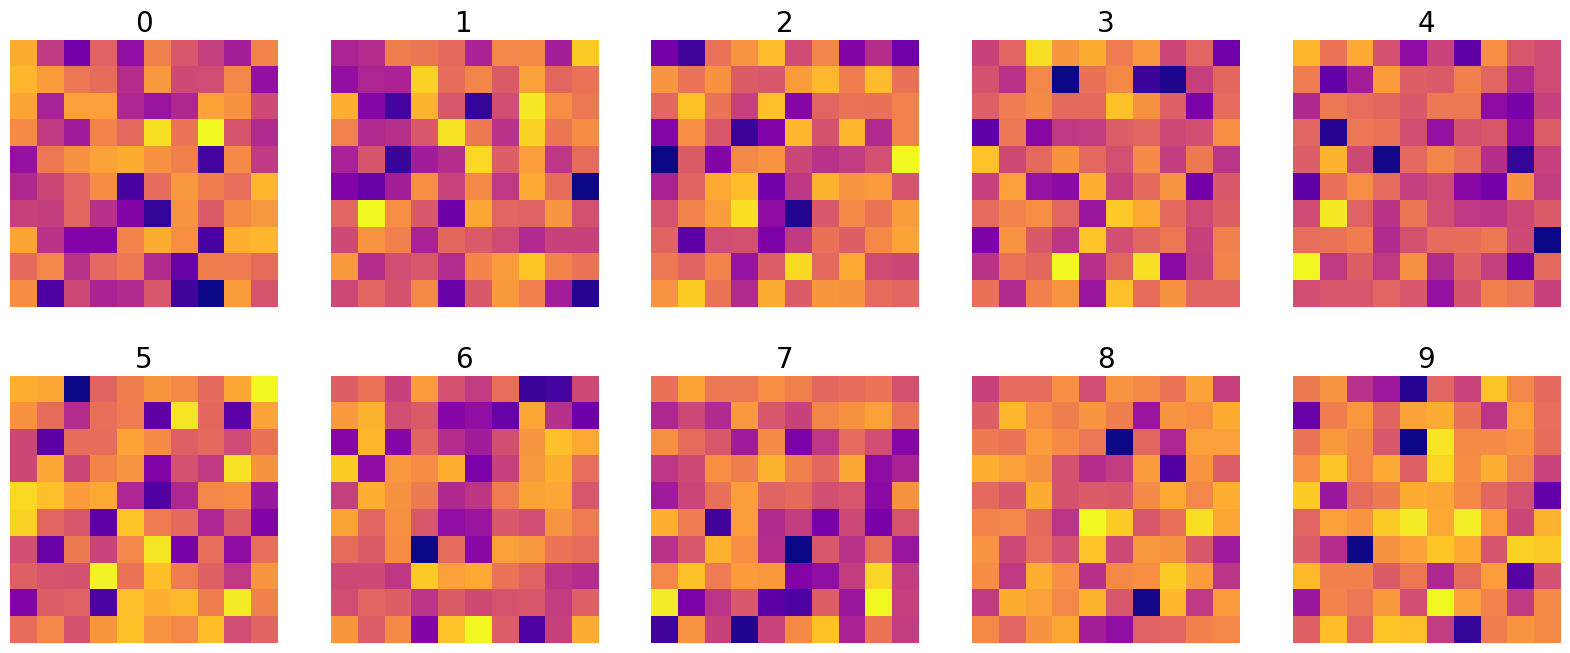

In [11]:
nn_params_2 = {}
for i in range(0,10):
    nn_params_2[i] = nn.coefs_[1][:,i]
plot_digits(nn_params_2,
n_rows = 2,
n_cols = 5,
fig_shape = (20,8),
img_shape = (10,10))

### (c) Gere a matriz de confusão para as previsões do Naive Bayes no conjunto de teste. Veja para cada classe qual é o erro mais comum e dê uma possível explicação.

In [16]:
nb_model = nb.fit(X_train,y_train)
pred = nb_model.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix_nb = confusion_matrix(y_true=y_test, y_pred=pred)
confusion_matrix_nb

array([[1198,    1,    6,   13,    3,   63,   31,    1,   25,    2],
       [   0, 1540,    8,    8,    1,   18,    3,    1,   17,    4],
       [  17,   25, 1133,   39,   29,    7,   57,   12,   55,    6],
       [   8,   36,   67, 1148,    3,   31,   13,   22,   60,   45],
       [   4,    7,    8,    0, 1042,    8,   22,    6,   26,  172],
       [  31,   22,    9,  190,   38,  906,   25,    7,   17,   28],
       [  15,   42,   32,    2,   19,   33, 1250,    0,    3,    0],
       [   8,   28,   11,    5,   34,    3,    0, 1274,   30,  110],
       [  17,   55,   23,  103,   14,   45,    6,    6, 1033,   55],
       [  11,   26,    8,   11,  101,    7,    0,   55,   37, 1164]])

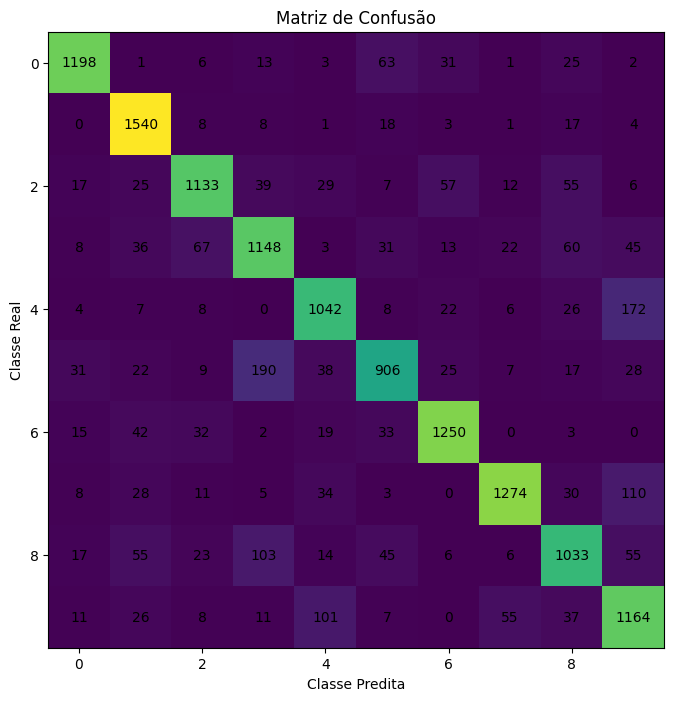

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=pred)

plt.figure(figsize=(8,8))
plt.imshow(cm) 
plt.title("Matriz de Confusão")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]),
                 ha="center", va="center")

plt.show()


In [20]:
n_classes = cm.shape[0]

FP = []
FN = []
TP = []
TN = []

for k in range(n_classes):

    tp = cm[k, k]

    fp = cm[:, k].sum() - tp
    fn = cm[k, :].sum() - tp
    tn = cm.sum() - (tp + fp + fn)

    TP.append(tp)
    FP.append(fp)
    FN.append(fn)
    TN.append(tn)

    print(f"Classe {k}:")
    print(f"  True Positives : {tp}")
    print(f"  False Positives: {fp}")
    print(f"  False Negatives: {fn}")
    print(f"  True Negatives : {tn}")
    print()


Classe 0:
  True Positives : 1198
  False Positives: 111
  False Negatives: 145
  True Negatives : 12546

Classe 1:
  True Positives : 1540
  False Positives: 242
  False Negatives: 60
  True Negatives : 12158

Classe 2:
  True Positives : 1133
  False Positives: 172
  False Negatives: 247
  True Negatives : 12448

Classe 3:
  True Positives : 1148
  False Positives: 371
  False Negatives: 285
  True Negatives : 12196

Classe 4:
  True Positives : 1042
  False Positives: 242
  False Negatives: 253
  True Negatives : 12463

Classe 5:
  True Positives : 906
  False Positives: 215
  False Negatives: 367
  True Negatives : 12512

Classe 6:
  True Positives : 1250
  False Positives: 157
  False Negatives: 146
  True Negatives : 12447

Classe 7:
  True Positives : 1274
  False Positives: 110
  False Negatives: 229
  True Negatives : 12387

Classe 8:
  True Positives : 1033
  False Positives: 270
  False Negatives: 324
  True Negatives : 12373

Classe 9:
  True Positives : 1164
  False Positi